##### Localizando pontos na região de saturação para serem ajustados </h5>

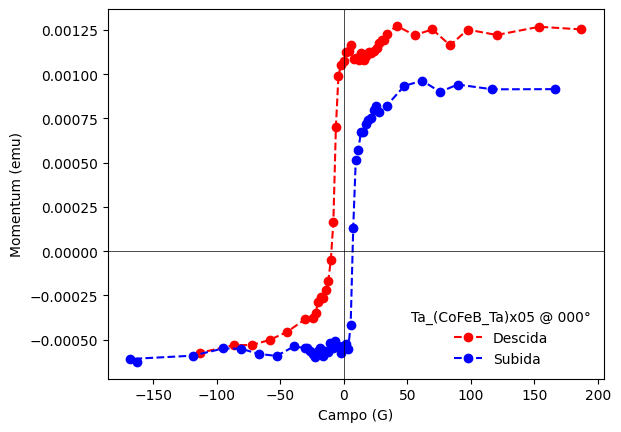

In [2]:
"""
CARREGANDO MÓDULOS NECESSÁRIOS
"""

import numpy as np #bibloteca para manipulação de arrays e aplicações matemáticas -CLEIZA #type: ignore
import matplotlib.pyplot as plt #biblioteca para plot de figuras -CLEIZA #type: ignore
import os #biblioteca para manipulação de diretórios/arquivos -CLEIZA
from caminhosDosDiretorios import diretorioDeDadosDesteDispositivo as caminhoDirDados #variavel que guarda o caminho do diretório dos arquivos de medida -ABQ
from funcoesDeNomeDeArquivo import extrairPartesDoNome, extrair_angulo, nomeConcatenadoDaAmostra #de funcoesDeNomeDeArquivo.py, chamamos aqui funcoes que extraem partes do nome do arquivo -ABQ

"""
CHAMANDO E RECONHECENDO DADOS
"""

#subdiretorio especifico que este script vai varrer para extrair os dados especificos, neste caso, será "/dadosCrus/". -ABQ
subdiretorioDeDadosAVarrer = caminhoDirDados+"dadosCrus/"

# Lista todos os arquivos na pasta -CLEIZA
arquivos = os.listdir(subdiretorioDeDadosAVarrer)

# Filtra apenas os arquivos .txt -CLEIZA
arquivos_txt = [arquivo for arquivo in arquivos if arquivo.endswith('.txt')]

caminho_arquivo = os.path.join(subdiretorioDeDadosAVarrer, "Ta_CoFeB_Ta_x_05_000.txt")

# Extrai o ângulo do nome do arquivo -CLEIZA
angulo = extrair_angulo(os.path.basename(caminho_arquivo))

# Carrega os dados do arquivo, ignorando 12 linhas -CLEIZA
dados = np.loadtxt(caminho_arquivo, skiprows=12)

# Extrai os dados de campo e magnetização -CLEIZA
campo = dados[:, 0]
magnetizacao = dados[:, 1]

"""
DIVIDINDO A CURVA DE HISTERESE EM DUAS (SUBIDA E DESCIDA)
"""

def metadeDoVetor(vetorAlvo):
    return (len(vetorAlvo)//2)

# Separando a curva de histerese em subida e descida-CLEIZA
campo_descida = campo[:metadeDoVetor(campo)]
magnetizacao_descida = magnetizacao[:metadeDoVetor(magnetizacao)]
campo_subida = campo[metadeDoVetor(campo):]
magnetizacao_subida = magnetizacao[metadeDoVetor(magnetizacao):]

"""
DEFININDO CARACTERÍSTICAS DA FIGURA (OPTATIVO)
"""
"""
# Define o tamanho da figura -CLEIZA
fig_size = (10, 8)

# Define o tamanho da fonte dos rótulos dos eixos x e y -CLEIZA
fonte_eixos = 14

# Define o tamanho da fonte dos títulos -CLEIZA
fonte_titulo = 16

# Define o tamanho dos números nos eixos x e y -CLEIZA
tamanho_numeros = 12

# Define o tamanho da fonte da legenda -CLEIZA
tamanho_legenda = 12

# Cria uma nova figura com tamanho definido -CLEIZA
plt.figure(figsize=fig_size)
"""
# Plota todos os pontos da curva de descida -CLEIZA
plt.plot(campo_descida, magnetizacao_descida, '--o', label='Descida', color='red')

# Plota todos os pontos da curva de subida -CLEIZA
plt.plot(campo_subida, magnetizacao_subida, '--o', label='Subida', color='blue')

# Adiciona linhas de eixo
plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA

# Adiciona grade ao gráfico (optativo)
#plt.grid(True, which='both', linestyle='-', color='gray',  linewidth=0.3)
#plt.grid(True, which='major', axis='both', color='gray', linewidth=0.3)

# Adiciona título e rótulos com tamanho de fonte personalizado -CLEIZA
plt.xlabel('Campo (G)') #optativamente, adicione aqui o argumento fontsize=fonte_eixos -ABQ
plt.ylabel('Momentum (emu)') #optativamente, adicione aqui o argumento fontsize=fonte_eixos -ABQ
plt.legend(loc = "lower right", title=f'Ta_(CoFeB_Ta)x05 @ {angulo}°', frameon=False)

# Define o tamanho dos números nos eixos x e y (optativo) -CLEIZA
#plt.tick_params(axis='both', which='major', labelsize=tamanho_numeros)



"""
DESTACANDO NA FIGURA PONTOS INDENTIFICADOS ANTERIORMENTE
"""
"""
# Identificação dos X primeiros e X últimos pontos da curva de subida -CLEIZA
plt.scatter(campo_subida[:4], magnetizacao_subida[:4], color='blue', s=100, edgecolors='black', zorder=5)
plt.scatter(campo_subida[-6:], magnetizacao_subida[-6:], color='blue', s=100, edgecolors='black', zorder=5)

# Identificação dos X primeiros e X últimos pontos da curva de descida -CLEIZA
plt.scatter(campo_descida[:7], magnetizacao_descida[:7], color='red', s=100, edgecolors='black', zorder=5)
plt.scatter(campo_descida[-5:], magnetizacao_descida[-5:], color='red', s=100, edgecolors='black', zorder=5)
"""
# Exibe o gráfico -CLEIZA
plt.show()


##### Calculando médias de acordo com a necessidade observada anteriormente

In [11]:

#declara-se aqui a constante para a quantidade de pontos que serão utilizados para calcular as médias. altere o valor dessa constante conforme adequar-se à curva crua -ABQ
QNT_PONTOS = int(6)

# Calcula as médias de tantos primeiros e tantos últimos pontos das curvas de subida e descida, sendo determinado pela constante "QNT_PONTOS" -CLEIZA/ABQ
media_primeiros_descida = np.mean(magnetizacao_descida[:QNT_PONTOS])
media_ultimos_descida = np.mean(magnetizacao_descida[-QNT_PONTOS:])
media_primeiros_subida = np.mean(magnetizacao_subida[:QNT_PONTOS])
media_ultimos_subida = np.mean(magnetizacao_subida[-QNT_PONTOS:])

# Calcula as médias extras solicitadas -CLEIZA
media_superiores = np.mean([media_ultimos_subida, media_primeiros_descida])
media_inferiores = np.mean([media_primeiros_subida, media_ultimos_descida])

# Imprime os valores das médias na tela -CLEIZA
print(f"Média dos {QNT_PONTOS} primeiros pontos da curva de subida: {media_primeiros_subida}")
print(f"Média dos {QNT_PONTOS} últimos pontos da curva de subida: {media_ultimos_subida}")
print(f"Média dos {QNT_PONTOS} primeiros pontos da curva de descida: {media_primeiros_descida}")
print(f"Média dos {QNT_PONTOS} últimos pontos da curva de descida: {media_ultimos_descida}")
print(f"Média entre os {QNT_PONTOS} último pontos da curva de subida e os X primeiro da curva de descida: {media_superiores}")
print(f"Média entre os {QNT_PONTOS} primeiro pontos da curva de subida e os X último da curva de descida: {media_inferiores}")

# Armazena os valores das médias em variáveis -CLEIZA
medias = {
    'media_primeiros_subida': media_primeiros_subida,
    'media_ultimos_subida': media_ultimos_subida,
    'media_primeiros_descida': media_primeiros_descida,
    'media_ultimos_descida': media_ultimos_descida,
    
    'media_superiores': media_superiores,
    'media_inferiores': media_inferiores
}

# Imprime as variáveis -CLEIZA
print(medias)

Média dos 6 primeiros pontos da curva de subida: -0.0005846208333333333
Média dos 6 últimos pontos da curva de subida: 0.0009281418333333334
Média dos 6 primeiros pontos da curva de descida: 0.0012351333333333332
Média dos 6 últimos pontos da curva de descida: -0.0004962575
Média entre os 6 último pontos da curva de subida e os X primeiro da curva de descida: 0.0010816375833333333
Média entre os 6 primeiro pontos da curva de subida e os X último da curva de descida: -0.0005404391666666667
{'media_primeiros_subida': -0.0005846208333333333, 'media_ultimos_subida': 0.0009281418333333334, 'media_primeiros_descida': 0.0012351333333333332, 'media_ultimos_descida': -0.0004962575, 'media_superiores': 0.0010816375833333333, 'media_inferiores': -0.0005404391666666667}


##### Ajuste da região de saturação de acordo com a necessidade observada

In [ ]:
# Cria uma cópia dos dados originais -CLEIZA
campo_substituido = np.copy(campo)
magnetizacao_substituida = np.copy(magnetizacao)

# Substitui os pontos da curva superior pela média -CLEIZA
magnetizacao_substituida[subida_indices[-5:]] = media_superiores
magnetizacao_substituida[descida_indices[:7]] = media_superiores

# Substitui os pontos da curva inferior pela média -CLEIZA
magnetizacao_substituida[subida_indices[:4]] = media_inferiores
magnetizacao_substituida[descida_indices[-6:]] = media_inferiores

# Define o tamanho da figura -CLEIZA
fig_size = (10, 8)

# Define o tamanho da fonte dos rótulos dos eixos x e y -CLEIZA
fonte_eixos = 14

# Define o tamanho da fonte dos títulos -CLEIZA
fonte_titulo = 16

# Define o tamanho dos números nos eixos x e y -CLEIZA
tamanho_numeros = 12

# Define o tamanho da fonte da legenda -CLEIZA
tamanho_legenda = 12

# Cria uma nova figura com tamanho definido -CLEIZA
plt.figure(figsize=fig_size)

# Plota todos os pontos da curva de histerese com as substituições -CLEIZA
plt.plot(campo, magnetizacao_substituida, label='Substituído', color='green', marker='o', linestyle='none')

#Plota linha ligando os pontos -CLEIZA
plt.plot(campo, magnetizacao_substituida)

# Adiciona linhas de grade
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
plt.axhline(0, color='black', linewidth=1)  # Linha de grade zero para magnetização -CLEIZA
plt.axvline(0, color='black', linewidth=1)  # Linha de grade zero para campo -CLEIZA

# Adiciona título e rótulos com tamanho de fonte personalizado -CLEIZA
plt.xlabel('Campo (G)', fontsize=fonte_eixos)
plt.ylabel('Momentum (emu)', fontsize=fonte_eixos)
plt.title(f'Curva de histerese (Ta_CoFeB_Ag_x15) para o ângulo {angulo}° com região de saturação ajustada', fontsize=fonte_titulo)

# Define o tamanho dos números nos eixos x e y -CLEIZA
plt.tick_params(axis='both', which='major', labelsize=tamanho_numeros)

# Adiciona legenda com tamanho de fonte personalizado -CLEIZA
#plt.legend(fontsize=tamanho_legenda) -CLEIZA

# Exibe o gráfico -CLEIZA
plt.show()


##### Salvando um novo .txt com os dados ajustados

Nesse caso, o arquivo com os dados originais é preservado e um novo arquivo com os dados ajustados é criado.

Recomendo ao pesquisador criar um diretório dentro do diretório com os dados brutos e adicionar o caminho onde deseja salvar os novos arquivos .txt para esse diretório.

In [ ]:
# Caminho onde deseja salvar o novo arquivo .txt -CLEIZA
caminho_salvar = 'C:/Winpython/WPy64-39100/notebooks/IC/CLEIZA/Ta_CoFeB_Ag_x15/Ajustado/'

# Obtém o nome do arquivo original sem o diretório -CLEIZA
nome_arquivo_original = os.path.basename(caminho_arquivo)

# Define o novo nome do arquivo inicial com "Ajustado" no início -CLEIZA
novo_nome_arquivo = f"Ajustado_{nome_arquivo_original}"

# Salva os dados substituídos como um novo arquivo .txt com o nome "Ajustado" no início -CLEIZA
novo_caminho_arquivo = os.path.join(caminho_salvar, novo_nome_arquivo)
np.savetxt(novo_caminho_arquivo, np.column_stack((campo, magnetizacao_substituida)), delimiter='\t', header='Campo (G)\tMomentum (emu)', comments='')

print(f'Os dados substituídos foram salvos no arquivo: {novo_caminho_arquivo}')